# Lecture 04: Random numbers and simulation

[Download on GitHub](https://github.com/NumEconCopenhagen/lectures-2022)

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2022/master?urlpath=lab/tree/04/Random_numbers_and_simulation.ipynb)

1. [Exchange economy with many consumers](#Exchange-economy-with-many-consumers)
2. [Random numbers](#Random-numbers)
3. [Demand](#Demand)
4. [Interactive figures](#Interactive-figures)
5. [Equilibrium](#Equilibrium)
6. [Numerical integration by Monte Carlo](#Numerical-integration-by-Monte-Carlo)
7. [Load and save variables](#Load-and-save-variables)
8. [Summary](#Summary)


You will learn how to use a random number generator with a seed and produce simulation results (**numpy.random**, **scipy.stats**), and calcuate the expected value of a random variable through Monte Carlo integration. You will learn how to save your results for later use (**pickle**). Finally, you will learn how to make your figures interactive (**ipywidgets**).

**Links:**

* [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html)
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
* [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)
* datacamp on [pickle](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)

**Imports:** We now import all the modules, we need for this notebook. Importing everything in the beginning makes it more clear what modules the notebook relies on.

In [1]:
import math
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import ipywidgets as widgets

<a id="Exchange-economy-with-many-consumers"></a>

# 1. Exchange economy with many consumers

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with uniformly *heterogenous* coefficients

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
 & \,\,\,\alpha_{j}\sim\mathcal{U}(\underline{\mu},\overline{\mu})\\
 & \,\,\,0<\underline{\mu}<\overline{\mu}<1
\end{aligned}
$$

4. Endowments are *homogenous* and given by

$$
\boldsymbol{e}^{j}=(e_{1}^{j},e_{2}^{j})=(k,1),\,k>0
$$
where good 2 is *numeraire*.

The implied **demand functions** are:

$$
\begin{aligned}
x_{1}^{\star j}(p_{1},p_{2},e^{j})&=&\alpha_{j}\frac{I}{p_{1}}=\alpha_{j}\frac{kp_{1}+p_{2}}{p_{1}} \\
x_{2}^{\star j}(p_{1},p_{2},e^{j})&=&(1-\alpha_{j})\frac{I}{p_{2}}=(1-\alpha_{j})\frac{kp_{1}+p_{2}}{p_{2}}
\end{aligned}
$$

The **equilibrium** for a random draw of $\alpha = \{\alpha_1,\alpha_2,\dots,\alpha_N\}$ is a set of **prices** $p_1$ and $p_2$ satifying:

$$
\begin{aligned}
x_1(p_1,p_2) = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) &= \sum_{j=1}^N e_1^j = Nk \\
x_2(p_1,p_2) = \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &= \sum_{j=1}^N e_2^j = N
\end{aligned}
$$

**Problem:** Solve for this equilibrium.  
But this requires a **distribution** of agents. Which means randomness.  
We need a random number generator (RNG)!

<a id="Random-numbers"></a>

# 2. Random numbers

The two main approaches to generating random numbers are:

1. **Physical observations** of random processes (radioactive decay,  atmospheric noise, roulette wheels, etc.)
2. **Algorithms** creating **pseudo-random numbers**. Numbers that are *determined* by the algo but **appear** random.

**Pseudo-random numbers** satisfy propoerties such that they are as good as random. It should be impossible (for all practical purposes) to calculate, or otherwise guess, from any given subsequence, any previous or future values in the sequence.

**More information:** See this [video](https://www.youtube.com/watch?v=C82JyCmtKWg&app=desktop#fauxfullscreen) by Infinite Series.

## 2.1 Numpy

Numpy provides various functions for drawing random numbers. We can, for example, draw random integers between 0 and 10000:

In [2]:
X = np.random.randint(0,10000,size=5)
print(X)

[4444 6433 9523 5280 9062]


**Problem:** How can we reproduce our results the next time we open Python?

**Solution:** Use a **seed**. This will fix the algorithm to give the same set numbers each time.     
Choose the seed, and reset the random number generator:

In [3]:
print('set seed to 2000 and create numbers:')
np.random.seed(2000)
print(np.random.uniform(size=5))

print('\nreset algorithm by stating the same seed again:')
np.random.seed(2000)
print(np.random.uniform(size=5))

set seed to 2000 and create numbers:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]

reset algorithm by stating the same seed again:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]


> **Note:** The first and third draws above are exactly the same.

We can also **save and load the state** of the random number generator.

In [4]:
# a. save state
state = np.random.get_state()
print('generate numbers from current state:')
print(np.random.uniform(size=5))

# b. draw some random number
print('\nchange state by generating some more numbers:')
print(np.random.uniform(size=5))

# c. reset state 
np.random.set_state(state)

# d. draw the same random numbers again
print('\ngenerate numbers from past state by reloading state:')
print(np.random.uniform(size=5))

generate numbers from current state:
[0.53203587 0.06810629 0.58452906 0.23789776 0.16075658]

change state by generating some more numbers:
[0.15211915 0.12706922 0.32744117 0.69415387 0.35896647]

generate numbers from past state by reloading state:
[0.53203587 0.06810629 0.58452906 0.23789776 0.16075658]


> **Important**: You should *only set the seed once* per program. Changing seed might brake randomness.

## 2.2 Different distributions

Draw random numbers from various distributions: normal, beta, uniform.

In [5]:
X = np.random.normal(loc=0,scale=1,size=10**6)
Y = np.random.beta(a=5,b=2,size=10**6)
Z = np.random.uniform(low=-2,high=2,size=10**6)

Create a **user-defined** probability distribution with `np.random.choice`

In [6]:
# a. Support of distribution
vec = np.array([-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2])

# b. Define probabilities
prob = np.exp(np.linspace(-1,1,vec.size))**1.1254 # all positive numbers
prob /= np.sum(prob) # make probabilities sum to one

# c. Get draws from distribution
K = np.random.choice(vec,size=10**6,p=prob)

Plot the various distributions:

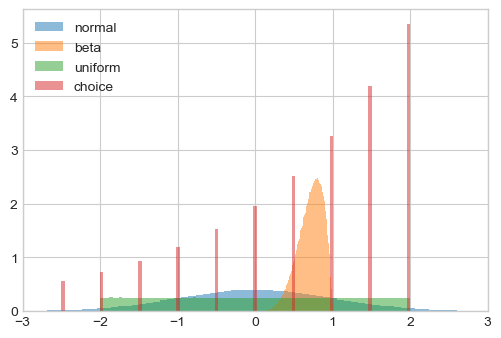

In [7]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.hist(X,bins=100,density=True,alpha=0.5,label='normal') # alpha < 1 = transparent
ax.hist(Y,bins=100,density=True,alpha=0.5,label='beta')
ax.hist(Z,bins=100,density=True,alpha=0.5,label='uniform')
ax.hist(K,bins=100,density=True,alpha=0.5,label='choice')
ax.set_xlim([-3,3])
ax.legend(loc='upper left'); # note: the ; stops output from being printed

**Task:** Follow this [link](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html). Choose a distribution and add it to the figure above.

## 2.3 Analytical results

Sometimes, you want to compare a distribution of numbers to a **known** distribution.   
For instance, how close are our draws to a normal distribution?  
In this case, the `scipy.stats.norm` module comes in handy.  
It operates differently from numpy. It creates an **object** to generate numbers from rather than just making an array at once. 

F pdf at 0.0:  0.503 
F cdf at 0.0:  0.369


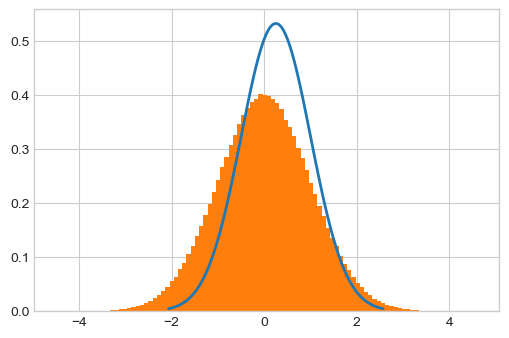

In [8]:
from scipy.stats import norm

# a. create analytical distribution
loc_guess = 0.25
scale_guess = 0.75

# Alternative: estimate the guesses
# loc_guess, scale_guess = norm.fit(X)

# Object to generate random numbers based on parameters
F = norm(loc=loc_guess,scale=scale_guess)
rnd = F.rvs(5) # example: create 5 random draws from the distribution F
print(f'F pdf at 0.0: {F.pdf(0.0): 1.3f} \nF cdf at 0.0: {F.cdf(0.0): 1.3f}') # the object F has several useful functions available  

# b. vector of x values
x_low = F.ppf(0.001) # x value where cdf is 0.001
x_high = F.ppf(0.999) # x value where cdf is 0.999
x_support = np.linspace(x_low,x_high,100)
x_guess = F.pdf(x_support) # call F to evaluate density at x_support

# c. compare X from before with new distribution
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x_support,x_guess,lw=2,label='estimated') 
ax.hist(X,bins=100,density=True,histtype='stepfilled'); # plot X using a histogram

In [9]:
# Scipy is built on Numpy. So the seed set by Numpy is carried over to Scipy.
np.random.seed(1)
print(F.rvs(5))
np.random.seed(1)
print(F.rvs(5))

[ 1.46825902 -0.20881731 -0.14612881 -0.55472647  0.89905572]
[ 1.46825902 -0.20881731 -0.14612881 -0.55472647  0.89905572]


**Task:** Make the pdf fit the historgram closely.

<a id="Demand"></a>

# 3. Demand

**Warm-up**: Choose parameters and define demand functions.

In [10]:
# a. parameters
N = 1000 # number of agents
k = 2 # relative endowment of good 1
mu_low = 0.1 # lower bound on alpha
mu_high = 0.9 # upper bound on alpha

# b. demand functions
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

def demand_good_2_func(alpha,p1,p2,k):
    I = k*p1+p2
    return (1-alpha)*I/p2

**Quizz:** take a quick [quizz](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UMFpSRTIzUlJKMkdFQlpIN1VZUE9EVTBaMSQlQCN0PWcu) regarding the demand functions.

$$ 
x_1(p_1,p_2) = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) = \alpha_{j}\frac{kp_{1}+p_{2}}{p_{1}}
$$

Find demand distribution and total demand:

In [11]:
def find_demand_good_1(alphas,p1,p2,k):
    distr = demand_good_1_func(alphas,p1,p2,k) # Notice we are passing in arrays of alphas together with scalars! It works because of numpy broadcasting.
    total = distr.sum()
    return distr,total

Calculate for various prices:

In [12]:
# a. draw alphas
alphas = np.random.uniform(low=mu_low, high=mu_high, size=N)

# b. a set of hypothetical prices
p1_vec = [0.5,1,2,5]
p2 = 1

# c. calculate demand given
dists = np.empty((len(p1_vec),N))
totals = np.empty(len(p1_vec))
for i,p1 in enumerate(p1_vec):
    dist,total = find_demand_good_1(alphas,p1,p2,k)
    dists[i,:] = dist
    totals[i] = total

Plot the resulting demand given prices

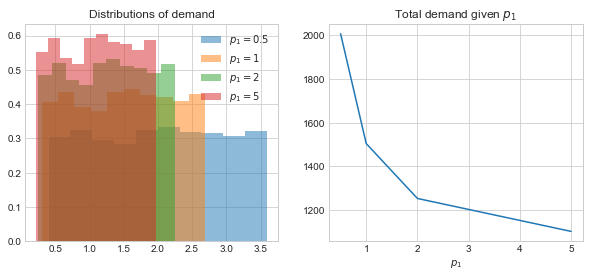

In [13]:
fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)
ax_left.set_title('Distributions of demand')
for i,p1 in enumerate(p1_vec):
    ax_left.hist(dists[i],density=True,alpha=0.5,label=f'$p_1 = {p1}$')
ax_left.legend(loc='upper right')

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title('Total demand given $p_1$')
ax_right.grid(True)
ax_right.plot(p1_vec,totals)
ax_right.set_xlabel('$p_1$');

<a id="Interactive-figures"></a>

# 4. Interactive figures

Create a function constructing a figure:

In [14]:
# This function tells the widget how the plot should look at a specific parametrization 
def interactive_figure(alphas,p1,p2,k):
    
    # a. calculations
    dist,_total = find_demand_good_1(alphas,p1,p2,k)
    
    # b. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.hist(dist,density=True)
    ax.set_xlim([0,4]) # fixed x range
    ax.set_ylim([0,0.8]) # fixed y range

**Case 1:** Make it interactive with a **slider**

In [15]:
# Write out which arguments to interactive_figure you want to be changing or staying fixed 
widgets.interact(interactive_figure,
    alphas=widgets.fixed(alphas),
    p1=widgets.FloatSlider(description="$p_1$", min=0.1, max=5, step=0.05, value=2),
    p2=widgets.fixed(p2),
    k=widgets.fixed(k)
);

interactive(children=(FloatSlider(value=2.0, description='$p_1$', max=5.0, min=0.1, step=0.05), Output()), _do…

**Case 2:** Make it interactive with a **textbox**:

In [16]:
widgets.interact(interactive_figure,
    alphas=widgets.fixed(alphas),
    p1=widgets.FloatText(description="$p_1$", value=2),
    p2=widgets.fixed(p2),
    k=widgets.fixed(k)
);

interactive(children=(FloatText(value=2.0, description='$p_1$'), Output()), _dom_classes=('widget-interact',))

**Case 3:** Make it interactive with a **dropdown menu**

In [17]:
widgets.interact(interactive_figure,
    alphas=widgets.fixed(alphas),
    p1=widgets.Dropdown(description="$p_1$", options=[0.5,1,1.5,2.0,2.5,3], value=2),
    p2=widgets.fixed(p2),
    k=widgets.fixed(k)
);

interactive(children=(Dropdown(description='$p_1$', index=3, options=(0.5, 1, 1.5, 2.0, 2.5, 3), value=2.0), O…

**Task:** Add a slider for \\(k\\) to the interactive figure below.

In [18]:
# change this code
widgets.interact(interactive_figure,
    alphas=widgets.fixed(alphas),
    p1=widgets.FloatSlider(description="$p_1$", min=0.1, max=5, step=0.05, value=2),
    p2=widgets.fixed(p2),
    k=widgets.fixed(k)
);

interactive(children=(FloatSlider(value=2.0, description='$p_1$', max=5.0, min=0.1, step=0.05), Output()), _do…

<a id="Equilibrium"></a>

# 5. Equilibrium

The equilibrium conditions were that **excess demand**, $Z$, is = 0 for both goods:

$$
\begin{aligned}
\sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) &= Nk \Leftrightarrow Z_1 \equiv \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) - Nk = 0 \\
\sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &= N \Leftrightarrow Z_2 \equiv \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) - N = 0
\end{aligned}
$$

**Idea:** Solve just the first equation. Then the second is satisfied due to Walras's law.

**Algorithm:**  
First choose a tolerance $\epsilon > 0$ and an adjustment factor $\kappa>0$, and a guess on $p_1 > 0$. 

Then find the equilibrium price by following iterative algorithm:

1. Calculate total excess demand of good 1: $Z_1 = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) - Nk$
2. If $|Z_1| < \epsilon $ stop
3. If $|Z_1| \geq \epsilon $ set $p_1 = p_1 + \kappa \cdot \frac{Z_1}{N}$
4. Return to step 1

**Intuition**  
If excess demand is **positive** and far from 0, then **increase** the price.  
If excess demand is **negative** and far from 0, then **decrease** the price.  

In [19]:
# Use the functions in module market_eq
%load_ext autoreload 
%autoreload 2
from market_eq import * 

Finding the equilibrium price.  
See `market_eq.py` for implementation. 

In [20]:
p1_guess = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1_guess,p2,k,kappa=kappa,eps=eps)

  0: p1 =   1.33614049 -> excess demand ->  -638.59506505
  1: p1 =   1.27399328 -> excess demand ->  -621.47217154
  2: p1 =   1.21367725 -> excess demand ->  -603.16023881
  3: p1 =   1.15531779 -> excess demand ->  -583.59459622
  4: p1 =   1.09904589 -> excess demand ->  -562.71902599
   ...
 25: p1 =   0.52566696 -> excess demand ->   -52.05606051
 50: p1 =   0.50324571 -> excess demand ->    -0.23547924
 75: p1 =   0.50315075 -> excess demand ->    -0.00094377
100: p1 =   0.50315037 -> excess demand ->    -0.00000378
125: p1 =   0.50315037 -> excess demand ->    -0.00000002
127: p1 =   0.50315037 -> excess demand ->    -0.00000001


**Check:** Ensure that excess demand of both goods are (almost) zero.

In [21]:
Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
Z2 = excess_demand_good_2_func(alphas,p1,p2,k)
print(Z1,Z2)
assert np.abs(Z1) < eps
assert np.abs(Z2) < eps

-9.737505024531856e-09 4.8994479584507644e-09


**Quizz:** take a quick quizz on the algorithm [here](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UMjRVRkEwQTRGVVJPVzRDS0dIV1VJWjhJVyQlQCN0PWcu)

<a id="Numerical-integration-by-Monte-Carlo"></a>

# 6. Numerical integration by Monte Carlo

Numerical integration is the task of computing

$$ 
\mathbb{E}[\mathbf{g}(x)]  \text{ where } x \sim F,
$$

where $F$ is a known probability distribution and $\mathbf{g}(\cdot)$ is a function. In terms of a integral this can also be writen as

$$
\mathbb{E}[\mathbf{g}(x)] = \int_{x\in\mathcal{X}} \mathbf{g}(x) dF(x) = \int_{x\in\mathcal{X}} \mathbf{g}(x) f(x) dx
$$

where $f$ is the PDF for the CDF $F$ and $\mathcal{X}$ is the domain of $x$.

In an economic model, $\mathbf{g}$ might represent the way the state of an agent or the economy develops stochastically. 

Relying on the law of large numbers we **approximate** the true integral with a finite sample:

$$
\mathbb{E}[\mathbf{g}(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \mathbf{g}(x_i) 
$$

where $x_i$ is drawn from $F$ using a random number generator. This is also called **numerical integration by Monte Carlo**.

For an easy implementation, we use  

$$
\mathbf{g}(x) = (x-2)^2
$$

**Monte Carlo function:**  

In [22]:
def g(x):
    return (x-2)**2

def MC(N,g,F):
    X = F.rvs(size=N) # rvs = draw N random values from F
    return np.mean(g(X)) # apply g to X

**Example** with a normal distribution:

In [23]:
N = 1000
mu = 0.1
sigma = 0.5
F = norm(loc=mu,scale=sigma)
mc_integral = MC(N,g,F)
print('E[g(x)] =', mc_integral)

E[g(x)] = 3.7852472195251456


Function for drawning \\( K \\) Monte Carlo samples:

In [24]:
def MC_sample(N,g,F,K):
    
    results = np.empty(K)
    for i in range(K):
        results[i] = MC(N,g,F)

    return results

The variance across Monte Carlo samples falls with larger $N$:

In [25]:
K = 1000
for N in [10**2,10**3,10**4,10**5]:
    results = MC_sample(N,g,F,K)
    print(f'N = {N:8d}: {results.mean():.6f} (std: {results.std():.4f})')

N =      100: 3.851283 (std: 0.1937)
N =     1000: 3.858242 (std: 0.0596)
N =    10000: 3.860276 (std: 0.0193)
N =   100000: 3.860187 (std: 0.0060)


In principle, you can always use Monte Carlo. But if $\mathbf{g}$ had been a very computationally costly function, Monte Carlo would be infeasible. But there are other ways, see Appendix. 

<a id="Load-and-save-variables"></a>

# 7. Load and save variables

## 7.1 Pickle

A good allround method for loading and saving is to use **pickle**. Here is how to save:

In [26]:
# a. variables
my_dict = {'a':1,'b':2}
my_vec = np.array([1,2,3])
my_tupple = (1,4,2)

# b. put them in a dictionary
my_data = {}
my_data['my_dict'] = my_dict
my_data['my_vec'] = my_vec
my_data['my_tupple'] = my_tupple

# c. save the dictionary in a file
with open(f'data.p', 'wb') as f: # wb = write binary
    pickle.dump(my_data, f)

Delete the variables:

In [27]:
del my_dict
del my_vec
del my_tupple

Load the data again:

In [28]:
# a. try
try:
    print(my_tupple)
except:
    print('my_vec does not exist')
    
# b. load    
with open(f'data.p', 'rb') as f: # rb = read binary
    data = pickle.load(f)
    my_dict = data['my_dict']
    my_vec = data['my_vec']
    my_tupple = data['my_tupple']
    
# c. try again
print(my_vec)
print(my_tupple)

my_vec does not exist
[1 2 3]
(1, 4, 2)


## 7.2 Saving with numpy

When only saving/loading **numpy arrays**, an alternative is to use ``np.savez`` (or ``np.savez_compressed``). This is typically faster than pickle.

Here is how to save some data:

In [29]:
my_data = {}
my_data['A'] = np.array([1,2,3])
my_data['B'] = np.zeros((5,8))
my_data['C'] = np.ones((7,3,8))
np.savez(f'data.npz', **my_data)
# '**' unpacks the dictionary

Here is how to load the data again:

In [30]:
# a. delete
del my_data

# a. load all
my_data = {}
with np.load(f'data.npz') as data_obj:
    for key in data_obj.files:
        my_data[key] = data_obj[key]
print(my_data['A'])

# b. load single array
X = np.load(f'data.npz')['A']
print(X)

[1 2 3]
[1 2 3]


## 7.3 Create a class to generate random numbers

In [31]:
class dice_cup:
    
    def __init__(self,ndice):
        self.ndice = ndice
    
    def roll(self):
        self.dice = np.random.randint(1,7,size=self.ndice)
        print(self.dice)
        
    def shuffle(self):
        np.random.shuffle(self.dice)
        print(self.dice)
        
    def roll_and_sum(self):
        pass
        
my_dice_cup = dice_cup(4)
my_dice_cup.roll()
my_dice_cup.shuffle()
my_dice_cup.roll_and_sum()

[2 5 1 5]
[1 5 5 2]


**Task:** Add a method ``roll_and_sum()`` to the class above, which rolls and print the sum of the dice. Compare the value of your roll to your neighbor.  
*(You can delete the pass statement when starting to code. It's there to inform Python that roll_and_sum() is well defined as Python cannot handle a totally codeless function)*

<a id="Summary"></a>

# 8. Summary

**This lecture:** We have talked about:

1. numpy.random: Drawing (pseudo-)random numbers (seed, state, distributions)
2. scipy.stats: Using analytical random distributions (ppf, pdf, cdf, rvs)
3. ipywidgets: Making interactive figures
4. pickle and np.savez: Saving and loading data

The method you learned for finding the equilibrium can be used in a lot of models. For example, a simple method can be applied with multiple goods.

**Your work:** Before solving Problem Set 2 read through this notebook and play around with the code.

**Next lecture:** Workflow and debugging. Go through these guides beforehand:

1. [Installing Python and VSCode](https://numeconcopenhagen.netlify.com//guides/python-setup)
2. [Running Python in JupyterLab](https://numeconcopenhagen.netlify.com//guides/jupyterlab)
3. [Running Python in VSCode](https://numeconcopenhagen.netlify.com//guides/vscode-basics)

You must have installed **git** and have a **GitHub account!** (step 2 in [Installing Python and VSCode](https://numeconcopenhagen.netlify.com//guides/python-setup)).

**Finally:** You can begin to think about who you want to work together with for the group assignments. We will talk more about inaugural project next-time.

## 8.1 Advanced: Middle-square method for generating random numbers

Proposed by **John von Neumann**:

1. Start with a $N$ digit number
2. Square the number
3. Pad the number with leading zeros making it a $2N$ digit number
4. Extract the middle $N$ digits (*your random number*)
5. Return to step 1 to generate one more

> **Pro:** Simple and easy to implement. Conceptually somewhat similar to more advanced methods (e.g. *Mersenne-Twister* used by *numpy*).
>
> **Con:** Cycles can be no longer than $8^N$ periods. Many repeating cycles are very short. Internal state is directly observable.
>
> **Conclusion:** Can not be used in practice.

**Code:** An implementation in Python for $N = 4$ digit random integers:

In [32]:
def rng(number,max_iter=100): 
    
    already_seen = [] # list of seen numbers
    
    i = 0
    while number not in already_seen and i < max_iter:
        
        already_seen.append(number)
        squared = number**2
        padded = str(squared).zfill(8) # add leading zeros
        number = int(padded[2:6]) # extract middle 4 numbers
        
        print(f"square = {squared:8d}, padded = {padded} -> {number:4d}")
        i += 1

A reasonable cycle:

In [33]:
rng(4653)

square = 21650409, padded = 21650409 -> 6504
square = 42302016, padded = 42302016 -> 3020
square =  9120400, padded = 09120400 -> 1204
square =  1449616, padded = 01449616 -> 4496
square = 20214016, padded = 20214016 -> 2140
square =  4579600, padded = 04579600 -> 5796
square = 33593616, padded = 33593616 -> 5936
square = 35236096, padded = 35236096 -> 2360
square =  5569600, padded = 05569600 -> 5696
square = 32444416, padded = 32444416 -> 4444
square = 19749136, padded = 19749136 -> 7491
square = 56115081, padded = 56115081 -> 1150
square =  1322500, padded = 01322500 -> 3225
square = 10400625, padded = 10400625 -> 4006
square = 16048036, padded = 16048036 ->  480
square =   230400, padded = 00230400 -> 2304
square =  5308416, padded = 05308416 -> 3084
square =  9511056, padded = 09511056 -> 5110
square = 26112100, padded = 26112100 -> 1121
square =  1256641, padded = 01256641 -> 2566
square =  6584356, padded = 06584356 -> 5843
square = 34140649, padded = 34140649 -> 1406
square =  

A short cycle:

In [34]:
rng(540)

square =   291600, padded = 00291600 -> 2916
square =  8503056, padded = 08503056 -> 5030
square = 25300900, padded = 25300900 -> 3009
square =  9054081, padded = 09054081 ->  540


No cycle at all:

In [35]:
rng(3792)

square = 14379264, padded = 14379264 -> 3792


## 8.2 Advanced: Gauss-Hermite quadrature

**Problem:** Numerical integration by Monte Carlo is **slow**.

**Solution:** Use smarter integration formulas on the form

$$
\mathbb{E}[g(x)] \approx \sum_{i=1}^{n} w_ig(x_i) 
$$

where $(x_i,w_i), \forall n \in \{1,2,\dots,N\}$, are called **quadrature nodes and weights** and are provided by some theoretical formula depending on the distribution of $x$.

**Example I, Normal:** If $x \sim \mathcal{N}(\mu,\sigma)$ then we can use [Gauss-Hermite quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature) as implemented below.

In [36]:
def gauss_hermite(n):
    """ gauss-hermite nodes

    Args:

        n (int): number of points

    Returns:

        x (numpy.ndarray): nodes of length n
        w (numpy.ndarray): weights of length n

    """

    # a. calculations
    i = np.arange(1,n)
    a = np.sqrt(i/2)
    CM = np.diag(a,1) + np.diag(a,-1)
    L,V = np.linalg.eig(CM)
    I = L.argsort()
    V = V[:,I].T

    # b. nodes and weights
    x = L[I]
    w = np.sqrt(math.pi)*V[:,0]**2

    return x,w

In [37]:
def normal_gauss_hermite(sigma, n=7, mu=None, exp=False):
    """ normal gauss-hermite nodes

    Args:

        sigma (double): standard deviation
        n (int): number of points
        mu (double,optinal): mean
        exp (bool,optinal): take exp and correct mean (if not specified)

    Returns:

        x (numpy.ndarray): nodes of length n
        w (numpy.ndarray): weights of length n

    """

    if sigma == 0.0 or n == 1:
        x = np.ones(n)
        if mu is not None:
            x += mu
        w = np.ones(n)
        return x,w

    # a. GaussHermite
    x,w = gauss_hermite(n)
    x *= np.sqrt(2)*sigma 

    # b. log-normality
    if exp:
        if mu is None:
            x = np.exp(x - 0.5*sigma**2)
        else:
            x = np.exp(x + mu)
    else:
        if mu is None:
            x = x 
        else:
            x = x + mu

    w /= np.sqrt(math.pi)

    return x,w

**Results:** Becuase the function is "nice", very few quadrature points are actually needed (*not generally true*).

In [38]:
for n in [1,2,3,5,7,9,11]:
    x,w = normal_gauss_hermite(mu=mu,sigma=sigma,n=n)
    result = np.sum(w*g(x))
    print(f'n = {n:3d}: {result:.10f}')

n =   1: 0.8100000000
n =   2: 3.8600000000
n =   3: 3.8600000000
n =   5: 3.8600000000
n =   7: 3.8600000000
n =   9: 3.8600000000
n =  11: 3.8600000000


**Example II, log-normal ([more info](https://en.wikipedia.org/wiki/Log-normal_distribution)):** 

1. Let $\log x \sim \mathcal{N}(\mu,\sigma)$. 
2. Gauss-Hermite quadrature nodes and weights can be used with the option `exp=True`. 
3. To ensure $\mathbb{E}[x] = 1$ then $\mu = -0.5\sigma^2$.

In [39]:
z = np.random.normal(size=1_000_000,scale=sigma)

print('mean(x) when mu = 0')
x,w = normal_gauss_hermite(mu=0,sigma=sigma,n=7,exp=True)
print(f'MC: {np.mean(np.exp(z)):.4f}')
print(f'Gauss-Hermite: {np.sum(x*w):.4f}')
print('')

print('mean(x), mu = -0.5*sigma^2')
x,w = normal_gauss_hermite(sigma=sigma,n=7,exp=True)
print(f'MC: {np.mean(np.exp(z)-0.5*sigma**2):.4f}')
print(f'Gauss-Hermite: {np.sum(x*w):.4f}')

mean(x) when mu = 0
MC: 1.1331
Gauss-Hermite: 1.1331

mean(x), mu = -0.5*sigma^2
MC: 1.0081
Gauss-Hermite: 1.0000
